# 3. Modelo Baseline (TF-IDF + Regressão Logística) - Dataset 2

Este notebook treina e avalia o modelo baseline de análise de sentimento.

## Objetivos
- Carregar dados processados.
- Dividir em treino e teste.
- Treinar Pipeline (TF-IDF + Logistic Regression).
- Avaliar performance.
- Salvar modelo treinado.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

sns.set_style("whitegrid")

## Carregamento dos Dados Processados

In [9]:
file_path = '../datasets/processed/reviews_dataset2_advanced.csv'
df = pd.read_csv(file_path)

# Garantir que não existem NaNs no texto processado
df = df.dropna(subset=['processed_text'])
print(f"Dados carregados: {df.shape}")
df.head()

Dados carregados: (101698, 4)


,review_text,rating,sentiment,processed_text
0,Muito bom gostei.,5,1,bom gostei
1,"Perfeito. Eu simplesmente amei , ele e maravil...",5,1,perfeito simplesmente amei maravilhoso super h...
2,Muito cheiroso e a consistência e maravilhosa.,5,1,cheiroso consistência maravilhosa
4,Produto maravilhoso.,5,1,produto maravilhoso
5,Muito bom. Veio certinho. Agora é usar pra sab...,5,1,bom veio certinho agora usar pra saber resulta...


## Divisão Treino e Teste

In [10]:
X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

Treino: 81358 amostras
Teste: 20340 amostras


## Pipeline de Treinamento

In [11]:
# Configuração do Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Treinamento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

## Avaliação

Acurácia: 0.9548672566371681

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72      1831
           1       0.97      0.99      0.98     18509

    accuracy                           0.95     20340
   macro avg       0.89      0.81      0.85     20340
weighted avg       0.95      0.95      0.95     20340



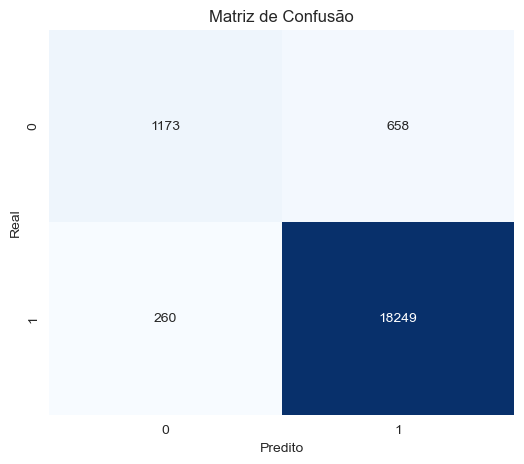

In [12]:
y_pred = pipeline.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## Salvar Modelo

In [13]:
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, 'baseline_model_tfidf_lr.pkl')

joblib.dump(pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

Modelo salvo em: ../models/baseline_model_tfidf_lr.pkl


## Teste com Exemplos Novos

In [14]:
# Sem o pipeline de pré-processamento o resultado pode ser incorreto.

examples = [
    "O produto chegou rápido e é muito bom, adorei!",
    "Péssima qualidade, quebrou no primeiro uso.",
    "Atendimento ruim, mas o produto é razoável."
]

preds = pipeline.predict(examples)
for text, pred in zip(examples, preds):
    sentiment = "Positivo" if pred == 1 else "Negativo"
    print(f"Texto: '{text}' -> Sentimento: {sentiment}")

Texto: 'O produto chegou rápido e é muito bom, adorei!' -> Sentimento: Positivo
Texto: 'Péssima qualidade, quebrou no primeiro uso.' -> Sentimento: Negativo
Texto: 'Atendimento ruim, mas o produto é razoável.' -> Sentimento: Negativo
